<a href="https://colab.research.google.com/github/Alok2304/DAV_28/blob/main/DAV_Exp4%2C5%2C6_D11AD_28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis using Python

Courtesy for Time Series Analysis using ARIMA Model :
* https://www.kaggle.com/code/ahmadjalalmasood123/time-series-analysis-using-arima-model
* https://www.youtube.com/watch?v=e8Yw4alG16Q
* https://www.kaggle.com/code/lejcruz/time-series-analysis-python
* https://www.youtube.com/playlist?list=PLqYFiz7NM_SMC4ZgXplbreXlRY4Jf4zBP

Courtesy for Dataset - [Electric_Production.csv (Kaggle)](https://www.kaggle.com/datasets/shenba/time-series-datasets)

## Step - 1 : Importing Python Packages, Loading Data and Displaying the top 5 and last 5 rows

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
rcParams['figure.figsize']=10,6

In [4]:
dataset = pd. read_csv("/content/Electric_Production.csv")
dataset.describe()

,IPG2211A2N
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [6]:
# Parse strings to datatime type
dataset['DATE'] = pd.to_datetime(dataset['DATE'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['DATE'])

In [7]:
indexedDataset.tail(5)

,IPG2211A2N
DATE,
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359
2017-12-01,114.7212
2018-01-01,129.4048


## Step - 2 : Plotting the raw data

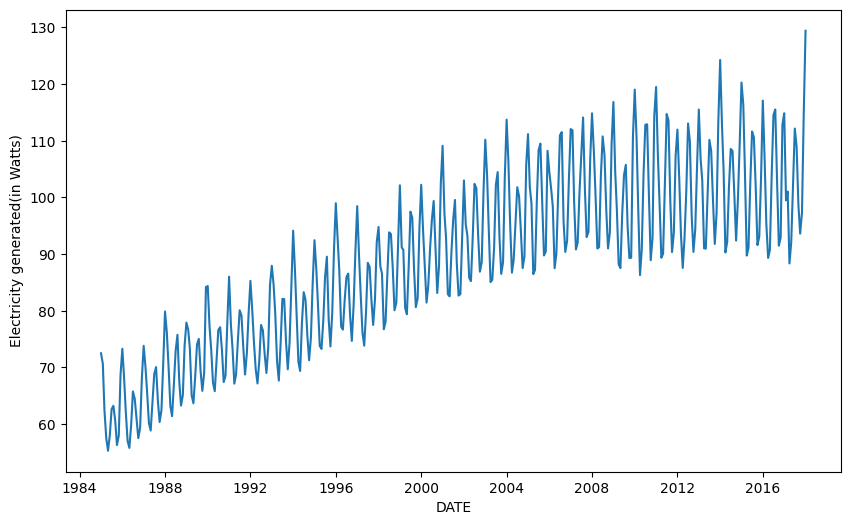

In [8]:
# Plot graph
plt.xlabel("DATE")
plt.ylabel("Electricity generated(in Watts)")
plt.plot(indexedDataset)

## Step - 3 : Check the stationarity of raw data

### a. Using Rolling Statistics

In [9]:
# Detecting Stationarity using Rolling Statistics
# As the mean is not constant, That
# rolling mean at yearly level
rollmean = indexedDataset.rolling(window=12).mean()
# rolling std at yearly level
rollstd = indexedDataset.rolling(window=12).std()
print(rollmean, rollstd)

            IPG2211A2N
DATE                  
1985-01-01         NaN
1985-02-01         NaN
1985-03-01         NaN
1985-04-01         NaN
1985-05-01         NaN
...                ...
2017-09-01  101.234450
2017-10-01  101.411700
2017-11-01  101.782192
2017-12-01  101.944842
2018-01-01  103.157700

[397 rows x 1 columns]             IPG2211A2N
DATE                  
1985-01-01         NaN
1985-02-01         NaN
1985-03-01         NaN
1985-04-01         NaN
1985-05-01         NaN
...                ...
2017-09-01    9.155641
2017-10-01    8.968447
2017-11-01    8.671317
2017-12-01    8.911131
2018-01-01   11.454780

[397 rows x 1 columns]


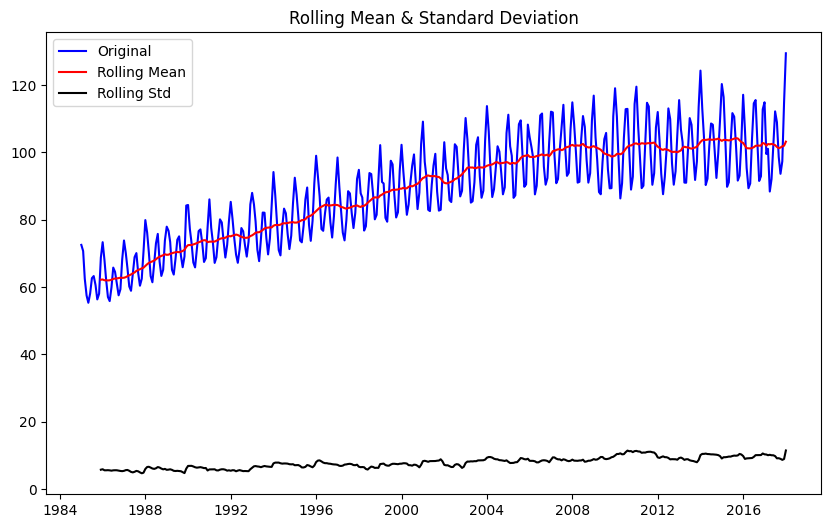

In [10]:
# Plot rolling statistics
orig = plt.plot(indexedDataset, color = 'blue', label = "Original")
mean = plt.plot(rollmean, color = 'red', label = "Rolling Mean")
std = plt.plot(rollstd, color = 'black', label = "Rolling Std")
plt.legend(loc = "best")
plt.title("Rolling Mean & Standard Deviation")
plt.show()

### b. Using Augmented Dicky-Fuller (ADF) Test

In [11]:
# Perform Dicky-Fuller Test
#import statsmodels.tsa.stattools
from statsmodels.tsa.stattools import adfuller
print("Results of Dickey Fuller Test")
# Here AIC helps to analyse the exact value from actual values and difference between them
dftest = adfuller(indexedDataset['IPG2211A2N'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test statistic','p-value','#Lags used','No. of observations used'])
for key, value in dftest[4].items():
  dfoutput['Critical value (%s)'%key]= value

print(dfoutput)

Results of Dickey Fuller Test
Test statistic               -2.256990
p-value                       0.186215
#Lags used                   15.000000
No. of observations used    381.000000
Critical value (1%)          -3.447631
Critical value (5%)          -2.869156
Critical value (10%)         -2.570827
dtype: float64


### c. test_stationarity()

 - Returns Plotting of Rolling Statistics
 - Test Statistics of Augmented Dicky-Fuller (ADF) test

In [12]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeSeries):
  # Determinig Rolling statistics
  movingaverage = timeSeries.rolling(window=12).mean()
  movingSTD = timeSeries.rolling(window=12).std()

  # Plot rolling statistics
  orig = plt.plot(timeSeries, color = 'blue', label = "Original")
  mean = plt.plot(movingaverage, color = 'red', label = "Rolling Mean")
  std = plt.plot(movingSTD, color = 'black', label = "Rolling Std")
  plt.legend(loc = "best")
  plt.title("Rolling Mean & Standard Deviation")
  plt.show()

  # Perform Dickey-Fuller Test
  print("Results of Dickey Fuller Test")
  dftest = adfuller(timeSeries['IPG2211A2N'], autolag='AIC')
  dfoutput = pd.Series(dftest[0:4],index=['Test statistic','p-value','#Lags used','No. of observations used'])
  for key, value in dftest[4].items():
    dfoutput['Critical value (%s)'%key]= value
  print(dfoutput)

## Step - 4 : Perform transformation to incorporate stationarity

#### Applying LogScale to Raw Data

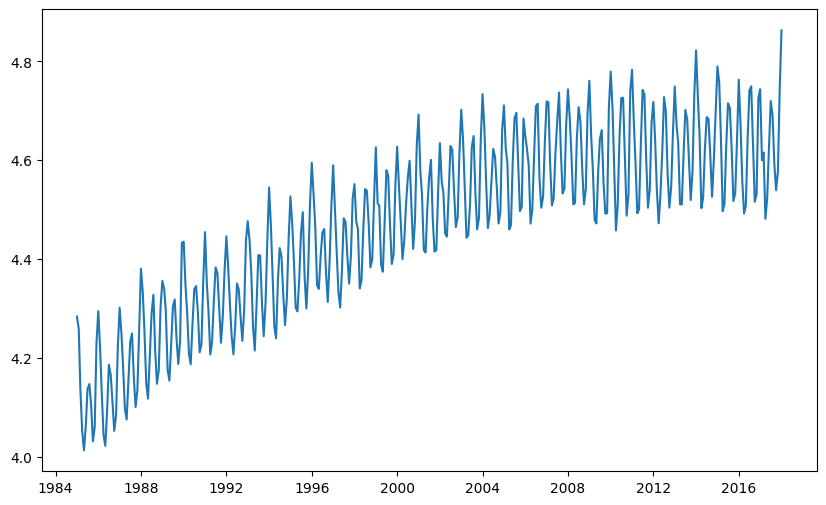

In [13]:
# Estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

***Observation*** : When plotted, the scale changes as raw data is transformed to Logarithmic Scale

### Transformation - 1 : Subtracting Moving Average from LogScale Data

#### 1(a) : Computation

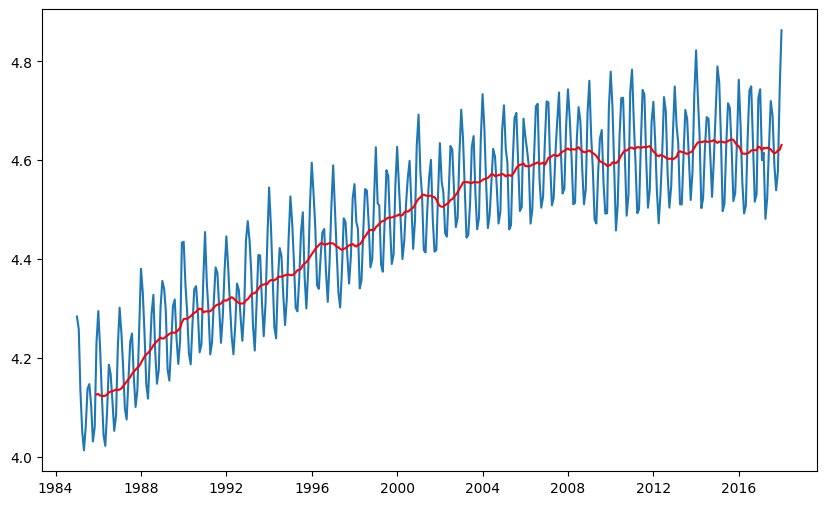

In [14]:
movingaverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingaverage, color='red')
#plt.plot(movingSTD, color='black')

In [15]:
dataLogScaleMinusMovingAverage = indexedDataset_logScale - movingaverage
dataLogScaleMinusMovingAverage.head(12)

,IPG2211A2N
DATE,
1985-01-01,NaN
1985-02-01,NaN
1985-03-01,NaN
1985-04-01,NaN
1985-05-01,NaN
1985-06-01,NaN
1985-07-01,NaN
1985-08-01,NaN
1985-09-01,NaN


In [16]:
#Remove NaN values
dataLogScaleMinusMovingAverage.dropna(inplace=True)
dataLogScaleMinusMovingAverage.head(18)

,IPG2211A2N
DATE,
1985-12-01,0.103961
1986-01-01,0.167724
1986-02-01,0.095629
1986-03-01,0.007329
1986-04-01,-0.079115
1986-05-01,-0.101472
1986-06-01,-0.033363
1986-07-01,0.055963
1986-08-01,0.034639


#### 1(b) : Plotting

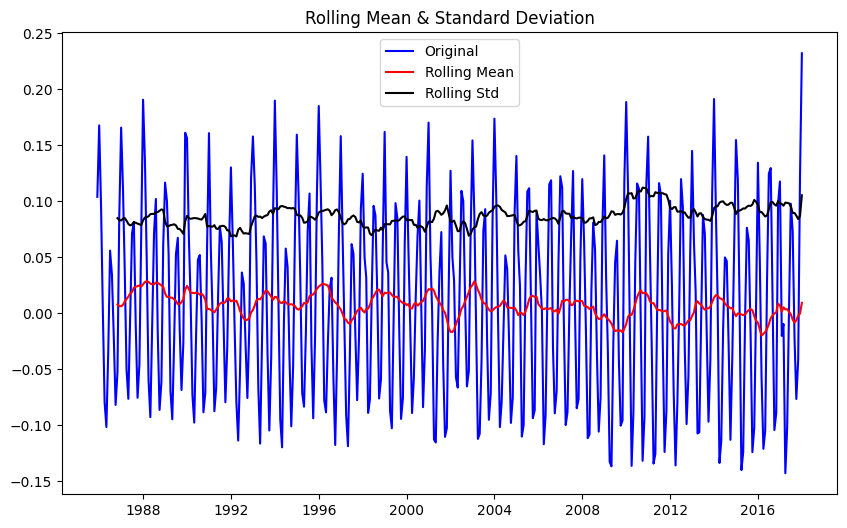

Results of Dickey Fuller Test
Test statistic               -5.211586
p-value                       0.000008
#Lags used                   15.000000
No. of observations used    370.000000
Critical value (1%)          -3.448148
Critical value (5%)          -2.869383
Critical value (10%)         -2.570948
dtype: float64


In [17]:
test_stationarity(dataLogScaleMinusMovingAverage)

Note :
* Test statistics & Critical values are almost equal. This helps to understand whether your data is stationary or not.
* p-value is almost nearer to 0


### Transformation - 2 : Subtrating Exponential Decay Weighted Average from LogScale Data

#### 2(a) : Computation

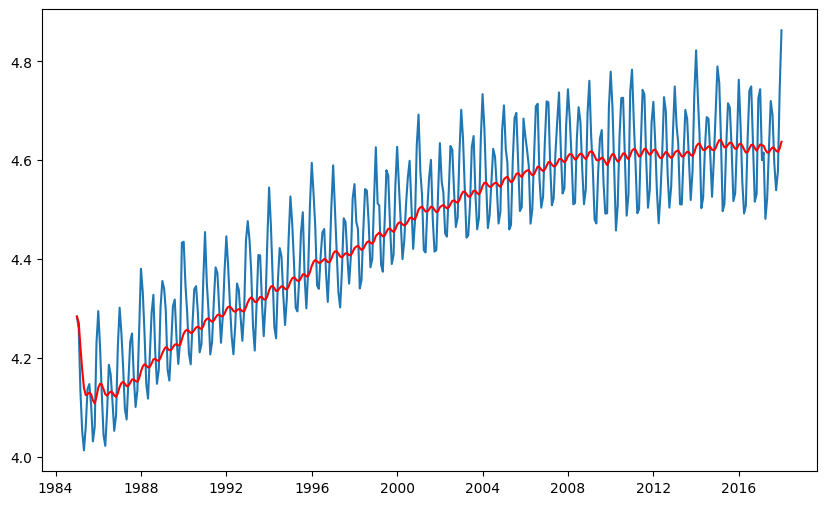

In [18]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12,min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')

As the time series progresses, the average is also progessing to higher side

In [19]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage

#### 2(c) :  Plotting

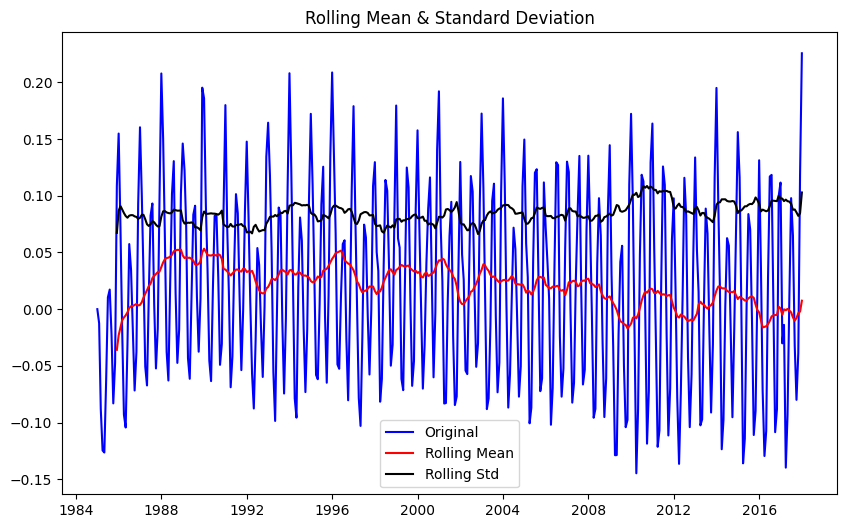

Results of Dickey Fuller Test
Test statistic               -3.251531
p-value                       0.017189
#Lags used                   15.000000
No. of observations used    381.000000
Critical value (1%)          -3.447631
Critical value (5%)          -2.869156
Critical value (10%)         -2.570827
dtype: float64


In [20]:
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

* The std deviation is almost flat. That means there is no trend.
* Rolling mean better than previous results.
* p value is nearing 0 ==> time series stationary.

## Step - 5 : Understanding the **Components** of Time Series

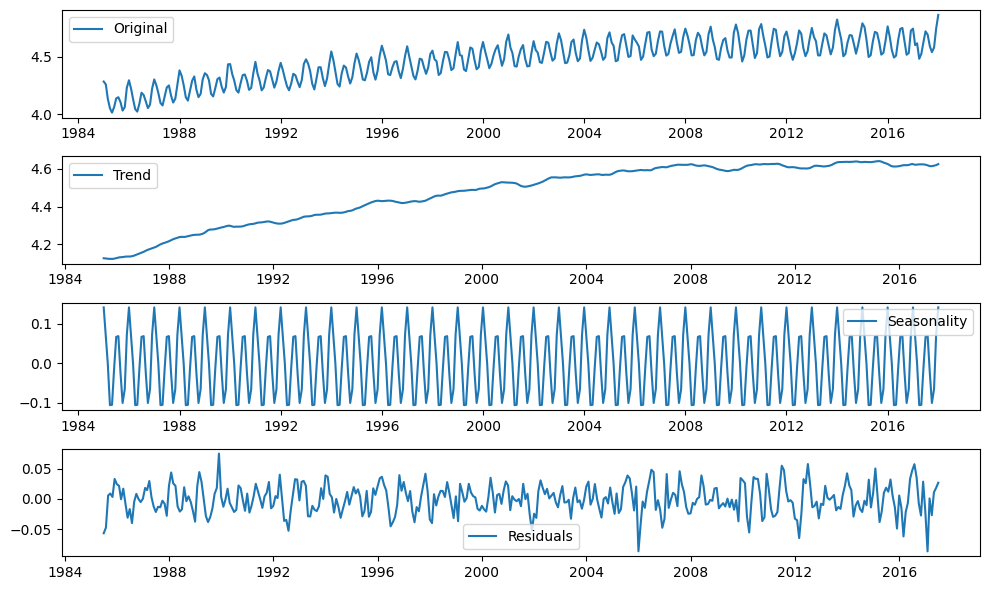

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(indexedDataset_logScale, label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

* It shows a positive trend
* Depicts the seasonality component in the dataset
* Depicts the irregularity /  residuals present in the data

## Step - 6 : Check whether the noise is stationary or not

In [22]:
decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
print(decomposedLogData)

DATE
1985-07-01   -0.056549
1985-08-01   -0.047294
1985-09-01    0.005724
1985-10-01    0.008954
1985-11-01    0.003336
                ...   
2017-03-01    0.000847
2017-04-01   -0.026743
2017-05-01    0.010879
2017-06-01    0.018331
2017-07-01    0.026774
Name: resid, Length: 385, dtype: float64


In [23]:
decomposedLogData.describe()

count    385.000000
mean      -0.000106
std        0.023880
min       -0.086378
25%       -0.016121
50%       -0.000118
75%        0.017180
max        0.074662
Name: resid, dtype: float64

In [24]:
decomposedLogData.head(12)

DATE
1985-07-01   -0.056549
1985-08-01   -0.047294
1985-09-01    0.005724
1985-10-01    0.008954
1985-11-01    0.003336
1985-12-01    0.032966
1986-01-01    0.024399
1986-02-01    0.021526
1986-03-01   -0.000560
1986-04-01    0.017005
1986-05-01   -0.007243
1986-06-01   -0.030872
Name: resid, dtype: float64

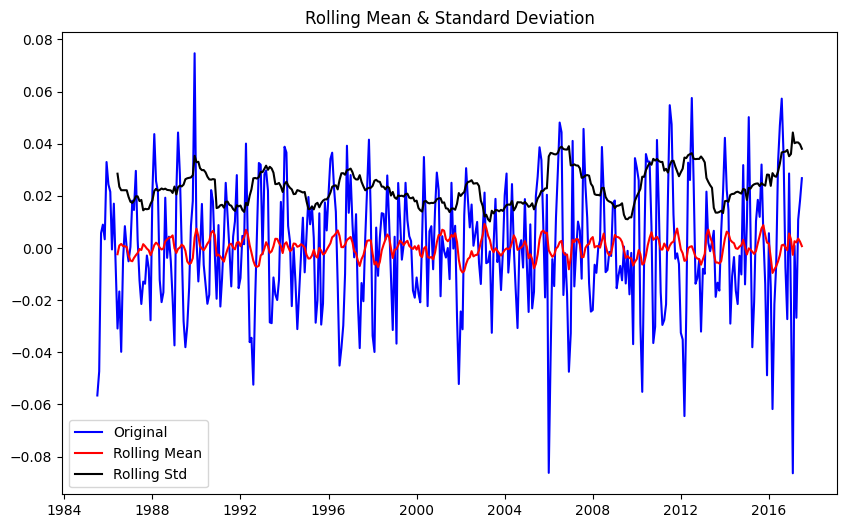

Results of Dickey Fuller Test


KeyError: 'IPG2211A2N'

In [25]:
test_stationarity(decomposedLogData)

Observation : The residuals are not stationary.

## Step - 7 : Implement the AR Model

### 7(a) : Plot the ACF and PACF graphs
- for LogScale Data from whihc Exponential Decay Weighted Average is subtracted

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf=plot_pacf(datasetLogScaleMinusMovingExponentialDecayAverage,lags=10)
acf=plot_acf(datasetLogScaleMinusMovingExponentialDecayAverage,lags=10)

### 7(b) : Split the LogScale Data for Training & Testing
- Training with 7 years data
- Testing with 5 years data

In [ ]:
train=datasetLogScaleMinusMovingExponentialDecayAverage[:len(datasetLogScaleMinusMovingExponentialDecayAverage)-60]
test=datasetLogScaleMinusMovingExponentialDecayAverage[len(datasetLogScaleMinusMovingExponentialDecayAverage)-60:]

### 7(c) : Train the AR Model

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
# AR Model with p = 2 from PACF plot
model_1 = AutoReg(train, lags=1).fit()

In [ ]:
print(model_1.summary())

Observation : Lower the p value, more significant that time lag

### 7(d) : Test the AR Model

In [ ]:
pred=model_1.predict(start=len(train),end=len(datasetLogScaleMinusMovingExponentialDecayAverage)-1, dynamic=False)

In [ ]:
print(len(train))

In [ ]:
print(pred)

In [ ]:
plt.plot(pred)
plt.plot(test, color='red')

### 7(e) : Calculate the Error

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(test,pred))
print(rmse)

### 7(f) : Making future predictions

In [ ]:
pred_future=model_1.predict(start=len(datasetLogScaleMinusMovingExponentialDecayAverage)+1, end=len(datasetLogScaleMinusMovingExponentialDecayAverage)+60, dynamic=False)
print("Prediction for next 5 years")
print(pred_future)
print("No. of predictions : \t", len(pred_future))

## Step - 8 : Implement ARIMA Model

### 8(a) : Deriving the parameters of ARIMA Models

Note :
* ARIMA model consists of 3 models
  - AR (Autoregression) model
  - Integration
  - MA (Movung Average) model
* ARIMA Model has 3 parameters
  - p : autoregressive lags
  - d : order of differnetiation (# times a time series is differentiated)
  - q : moving average

#### 8(a) - 1 : Compute d *value*
Differentiate the LogScale Data by 1 ie. d = 1

In [ ]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

In [ ]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

* Rolling Mean, Output is quite flat.
* Null Hypothesis / ADF is rejected as the time series is stationary.
* There is no trend



* This clearly states that, the time series is not stationary. So, we require the moving average parameter in place.

* We know the value of d = 1

#### 8(a)-2 : Compute p & q values

* Autocorrelation Function (ACF) Graph : To find q value
* Partial Autocorrelation Function (PACF) Graph : To compute p value

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(datasetLogScaleMinusMovingExponentialDecayAverage, nlags=20)
lag_pacf = pacf(datasetLogScaleMinusMovingExponentialDecayAverage,nlags=20, method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.title("Autocorrelation Function")

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

Check where the value drops to 0 for the first time in each of these graphs.
* In PACF graph : p value = 2 (around)
* In ACF graph : q value = 2 (around)

As we know the values of p, q, and d, Lets substitute the values in the ARIMA Model.

### 8(b) : Compute the Models

#### 8(b) - 1 : AR Model using ARIMA package

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# AR Model
model_0 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(2,0,0))
results_AR = model_0.fit()
print(results_AR.fittedvalues)
print('RSS: %f' % sum((results_AR.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['#Passengers'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_AR.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['#Passengers'])**2))
print("Plotting AR Model")

#### 8(b) - 2 : MA Model using ARIMA package

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# MA Model
model_02 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(0,0,2))
results_MA = model_02.fit()
print(results_MA.fittedvalues)
print('RSS: %f' % sum((results_MA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['IPG2211A2N'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_MA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['IPG2211A2N'])**2))
print("Plotting Ma Model")

 #### 8(b) - 3 : ARMA Model using ARIMA package

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# ARMA Model
model_03 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(2,0,2))
results_ARMA = model_03.fit()
print(results_ARMA.fittedvalues)
print('RSS: %f' % sum((results_ARMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['IPG2211A2N'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_ARMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['IPG2211A2N'])**2))
print("Plotting ARIMA Model")

 #### 8(b) - 4 : ARIMA Model using ARIMA package

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA Model
model_1 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(2,1,2))
results_ARIMA = model_1.fit()
print(results_ARIMA.fittedvalues)
print('RSS: %f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['IPG2211A2N'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['IPG2211A2N'])**2))
print("Plotting ARIMA Model")

### 8(c) : Install the pmdarima package

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima import auto_arima
#ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit=auto_arima(indexedDataset_logScale, trace=True,suppress_warnings=True)
stepwise_fit.summary()

Note : SARIMAX - ARIMA with seasonality

#### Fit the ARIMA Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA Model
model_2 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(4,1,3))
results_ARIMA = model_2.fit()
print(results_ARIMA.fittedvalues)
print('RSS: %f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['IPG2211A2N'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['IPG2211A2N'])**2))
print("Plotting ARIMA Model")

### 8(d) : Prepare the fitted values for predictions

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA Model with
model_3 = ARIMA(datasetLogDiffShifting, order=(4,1,3))
results_ARIMA = model_3.fit()
print(results_ARIMA.fittedvalues)
print('RSS: %f' % sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['IPG2211A2N'])**2))
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['IPG2211A2N'])**2))
print("Plotting ARIMA Model")

#### 8(d) - 1 : Convert the fitted values into a Series Format

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())

#### 8(d)- 2 : Find the Cummulative Sum and find the predictions for the fitted values

In [ ]:
#Convert to Cummulative Sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

In [ ]:
predictiona_ARIMA_log = pd.Series(indexedDataset_logScale['IPG2211A2N'].iloc[0],index = indexedDataset_logScale.index)
predictiona_ARIMA_log = predictiona_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictiona_ARIMA_log.head()

#### 8(d)-3 :  Perform Exponential of the data to bring it to original form

In [ ]:
predictions_ARIMA = np.exp(predictiona_ARIMA_log)

#### 8(d)-4: Plot the predictions made by ARIMA Model over the original Data

In [ ]:
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA, color='red')

Note:  Here the ARIMA model capture the shape of the Time Series. Only the magnitude varies.

### 8(e) : Predictions for 2 years

In [ ]:
# Check the dimension of the dataset
indexedDataset_logScale

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
# We have 144 rows + 24 to be predictions
plot_predict(results_ARIMA,1,168)

In [ ]:
results_ARIMA.forecast(steps=24)

### Approach  - 2

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
print(datasetLogScaleMinusMovingExponentialDecayAverage.shape)
train=datasetLogScaleMinusMovingExponentialDecayAverage.iloc[:-60]
test=datasetLogScaleMinusMovingExponentialDecayAverage.iloc[-60:]
print(train.shape,test.shape)